In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_populacao_brasileira=pd.read_csv('/content/drive/MyDrive/arquivos .csv/populacao_brasileira.csv.csv',index_col=0)

In [4]:
df_populacao_brasileira.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


In [5]:
df_populacao_brasileira.shape

(1000, 6)

In [6]:
df_populacao_brasileira.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   estado                           1000 non-null   object 
 1   idade                            1000 non-null   int64  
 2   escolaridade                     1000 non-null   object 
 3   nível de proficiência em inglês  1000 non-null   object 
 4   renda                            1000 non-null   float64
 5   sexo                             1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 54.7+ KB


In [7]:
df_populacao_brasileira.describe()

,idade,renda
count,1000.000000,1000.000000
mean,40.986000,3082.537180
std,13.497852,996.572239
min,18.000000,103.740000
25%,29.000000,2425.815000
50%,42.000000,3076.415000
75%,52.000000,3714.487500
max,64.000000,5632.380000


Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:


1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.


In [8]:
# filtrando o dataframe para exibir apenas as pessoas com nível avançado de inglês
pessoas_fluentes=df_populacao_brasileira[df_populacao_brasileira['nível de proficiência em inglês']=='Avançado']
pessoas_fluentes


,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
4,SE,25,Fundamental,Avançado,3529.80,M
5,AM,38,Fundamental,Avançado,4441.57,F
7,DF,36,Superior,Avançado,2203.10,F
9,AP,28,Superior,Avançado,2796.95,M
18,MS,41,Pós-graduação,Avançado,2512.39,F
...,...,...,...,...,...,...
989,RR,30,Médio,Avançado,4543.24,M
991,RO,20,Superior,Avançado,1880.38,F
993,RS,23,Superior,Avançado,1231.56,M
994,DF,27,Pós-graduação,Avançado,3323.17,F


In [9]:
# calculando a probabilidade de ser fluente
probabilidade_fluentes=pessoas_fluentes.shape[0]/1000
probabilidade_fluentes

0.344

In [10]:
# calculando a probabilidade complementar, isto é, a probabilidade de não ser fluente
probabilidade_nao_fluente=(1-probabilidade_fluentes)

print('A probabilidade de uma pessoa escolhida ao acaso não ser fluente em inglês é: ', round(probabilidade_nao_fluente * 100, 2), ' %')

A probabilidade de uma pessoa escolhida ao acaso não ser fluente em inglês é:  65.6  %


2. Se uma pessoa escolhida aleatoriamente for de
Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [11]:
# filtrando o dataframe e exibindo a quantidade de pessoas de Alagoas ou Pará
alagoas_para=df_populacao_brasileira[df_populacao_brasileira['estado'].isin(['AL','PA'])]
alagoas_para.shape[0]

79

In [12]:
# filtrando os alagoanos e paraenses que possuem renda acima de 5mil
maior_5mil=alagoas_para[alagoas_para['renda']>5000]
maior_5mil

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
116,PA,29,Fundamental,Intermediário,5573.36,F
371,PA,57,Fundamental,Intermediário,5163.25,M
619,AL,62,Fundamental,Básico,5252.44,M
691,AL,53,Superior,Intermediário,5210.52,F


In [13]:
# quantidade de Alagoanos/ Paraenses que possuem renda acima de 5 mil
acima_5mil=len(maior_5mil)
acima_5mil

4

In [14]:
probabilidade_al_pa_5k=acima_5mil/alagoas_para.shape[0]

print('A probabilidade de uma pessoa escolhida aleatoriamente ser do Pará ou Alagoas, e possuir uma renda maior de 5 mil é', round(probabilidade_al_pa_5k*100,2),' %')

A probabilidade de uma pessoa escolhida aleatoriamente ser do Pará ou Alagoas, e possuir uma renda maior de 5 mil é 5.06  %


3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?


In [15]:
# filtrando o dataframe para exibir apenas a população do Amazonas
populacao_amazonas=df_populacao_brasileira[df_populacao_brasileira['estado']=='AM']
populacao_amazonas.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
2,AM,32,Fundamental,Intermediário,3835.69,M
5,AM,38,Fundamental,Avançado,4441.57,F
13,AM,57,Médio,Básico,2844.32,M
23,AM,38,Médio,Intermediário,5075.40,M
45,AM,31,Pós-graduação,Básico,5270.69,F


In [16]:
# exibindo a quantidade de pessoas do Amazonas
populacao_amazonas.shape[0]

38

In [17]:
# filtrando pessoas do Amazonas que possuam Superior completo
superior_amazonas=populacao_amazonas[populacao_amazonas['escolaridade'].isin(['Superior','Pós-graduação'])]
superior_amazonas.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
45,AM,31,Pós-graduação,Básico,5270.69,F
54,AM,25,Superior,Intermediário,3478.98,M
97,AM,41,Superior,Intermediário,1345.14,F
149,AM,21,Superior,Básico,2625.18,F
230,AM,33,Pós-graduação,Intermediário,2373.03,M


In [18]:
# Exibindo a quantidade de pessoas do Amazonas que possuem superior completo
superior_amazonas.shape[0]

21

In [19]:
probabilidade_superior_am= (superior_amazonas.shape[0])/(populacao_amazonas.shape[0])

print('A probabilidade de uma pessoa ter superior completo no Amazonas é ',round(probabilidade_superior_am*100,2),' %')


A probabilidade de uma pessoa ter superior completo no Amazonas é  55.26  %


In [20]:
probabilidade_quinta_pessoa=stats.geom.pmf(5,probabilidade_superior_am)

print('A probabilidade da quinta pessoa amazonense ter ensino superior completo é ',round(probabilidade_quinta_pessoa*100,2),'%')

A probabilidade da quinta pessoa amazonense ter ensino superior completo é  2.21 %


 4.Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?


In [21]:
# determinando o intervalo da faixa de valores=1500
intervalo = 1500
# criando um array que conterá as faixas de renda, iniciando em 0, com iteração de 1500, até o valor máximo da coluna 'renda' mais 1500
faixas_renda = np.arange(0, df_populacao_brasileira['renda'].max() + intervalo, intervalo)
# fazendo a contagem da frequencia de valores da coluna 'renda' por faixa de renda
contagem_por_faixa, _ = np.histogram(df_populacao_brasileira['renda'], bins=faixas_renda)
# retornando o índice onde ocorreu a maior frequência dos resultados
maioria_renda = np.argmax(contagem_por_faixa) * intervalo

print("A maioria da população tem renda na faixa de valores:", maioria_renda, "-", maioria_renda + intervalo)

A maioria da população tem renda na faixa de valores: 3000 - 4500


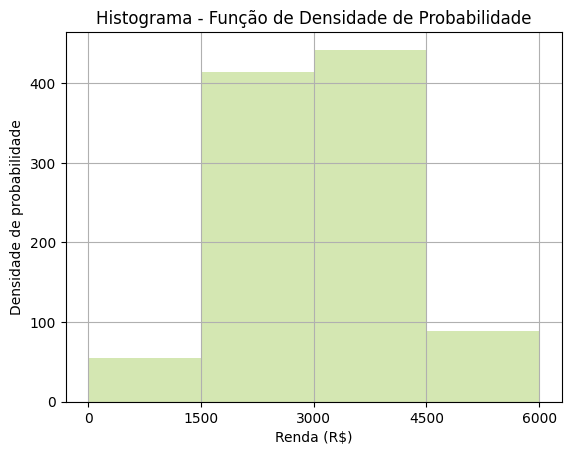

In [22]:
plt.hist(df_populacao_brasileira['renda'], bins=faixas_renda, color='#D4E7B2')
plt.title('Histograma - Função de Densidade de Probabilidade')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.xticks(faixas_renda)
plt.show()

5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

In [23]:
media=df_populacao_brasileira['renda'].mean()
variancia=df_populacao_brasileira['renda'].var()


print('A média da renda é ',media,' e a variância da renda é ', variancia)

A média da renda é  3082.5371800000003  e a variância da renda é  993156.228167617


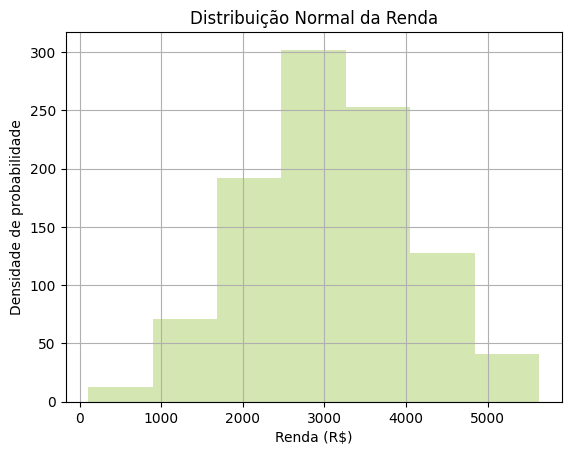

In [24]:
plt.hist(df_populacao_brasileira['renda'],bins=7, color='#D4E7B2')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [25]:
pos_graduado=df_populacao_brasileira[df_populacao_brasileira['escolaridade']=='Pós-graduação'].shape[0]

probabilidade_pos=pos_graduado/(df_populacao_brasileira.shape[0])

print('A probabilidade de ter pós-graduação é ',round(probabilidade_pos*100,2),' %')


A probabilidade de ter pós-graduação é  25.3  %


In [26]:
pesquisa_243k=243000
pop_pesquisada=1000000
prob_nova_pop=stats.binom.pmf(pesquisa_243k,pop_pesquisada,probabilidade_pos)
prob_nova_pop


print('A probabilidade de encontrarmos 243 mil pessoas com pós-graduação, considerando-se a população de 1 milhão de pessoas e mantendo a proporção do dataframe é de: ',prob_nova_pop)

A probabilidade de encontrarmos 243 mil pessoas com pós-graduação, considerando-se a população de 1 milhão de pessoas e mantendo a proporção do dataframe é de:  1.1104854289794913e-119


7. Somando as densidades nós temos a função de densidade acumulada.Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [27]:
# contando quantos indivíduos possuem em cada nível
df_escolaridade=df_populacao_brasileira['escolaridade'].value_counts()
df_escolaridade = df_escolaridade.reset_index()
df_escolaridade.columns = ['Escolaridade', 'Contagem']
df_escolaridade

,Escolaridade,Contagem
0,Fundamental,266
1,Pós-graduação,253
2,Superior,243
3,Médio,238


In [28]:
# ordenando a coluna 'Escolaridade'
ordem_niveis = ['Fundamental', 'Médio', 'Superior', 'Pós-graduação']
df_escolaridade['Escolaridade'] = pd.Categorical(df_escolaridade['Escolaridade'], categories=ordem_niveis, ordered=True)
df_escolaridade = df_escolaridade.sort_values(by='Escolaridade')
df_escolaridade

,Escolaridade,Contagem
0,Fundamental,266
3,Médio,238
2,Superior,243
1,Pós-graduação,253


In [29]:
# calculando a densidadede cada nível
df_escolaridade['densidade']=(df_escolaridade['Contagem']/1000)*100
df_escolaridade

,Escolaridade,Contagem,densidade
0,Fundamental,266,26.6
3,Médio,238,23.8
2,Superior,243,24.3
1,Pós-graduação,253,25.3


In [30]:
# calculando a densidade acumulada de cada nível
df_escolaridade['densidade_acumulada']=df_escolaridade['densidade'].cumsum()
df_escolaridade

,Escolaridade,Contagem,densidade,densidade_acumulada
0,Fundamental,266,26.6,26.6
3,Médio,238,23.8,50.4
2,Superior,243,24.3,74.7
1,Pós-graduação,253,25.3,100.0


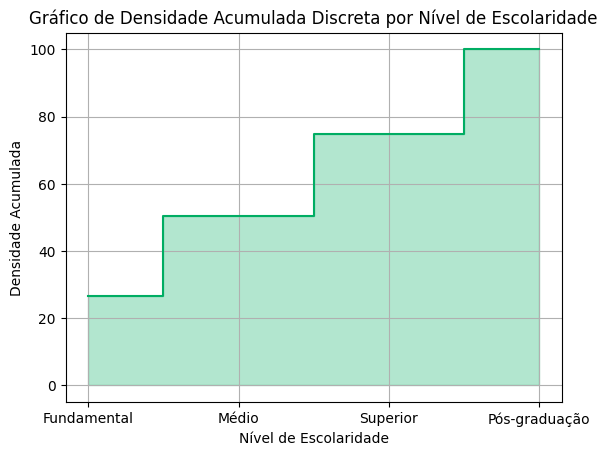

In [31]:
# plotando o gráfico da densidade acumulada
plt.step(df_escolaridade['Escolaridade'], df_escolaridade['densidade_acumulada'], where='mid', label='Densidade Acumulada', color='#00AD63')
plt.fill_between(df_escolaridade['Escolaridade'], df_escolaridade['densidade_acumulada'], step='mid', alpha=0.3, color='#00AD63')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Densidade Acumulada')
plt.title('Gráfico de Densidade Acumulada Discreta por Nível de Escolaridade')
plt.grid(True)
plt.show()

8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?


In [32]:
df_populacao_brasileira.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


In [33]:
# calculando a proporção de pessoas com inglês intermediário
ingles_intermediario=(df_populacao_brasileira[df_populacao_brasileira['nível de proficiência em inglês']=='Intermediário']).shape[0]

prop_ingles_intermediario=ingles_intermediario/df_populacao_brasileira.shape[0]
prop_ingles_intermediario

0.329

In [34]:
z=1.96
total_pessoas=1000
margem_erro = z * np.sqrt((prop_ingles_intermediario * (1 - prop_ingles_intermediario)) / total_pessoas)

print('A margem de erro, considerando 95% de confiança é ',round(margem_erro*100,2),' %')

A margem de erro, considerando 95% de confiança é  2.91  %


9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [35]:
# calculando a média da renda da população
media_renda=df_populacao_brasileira['renda'].mean()
media_renda

3082.5371800000003

In [36]:
# filtrando as pessoas que possuem renda superior à média
mil_acima_media = df_populacao_brasileira[df_populacao_brasileira['renda'] > (media_renda + 1000)]
mil_acima_media.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
5,AM,38,Fundamental,Avançado,4441.57,F
14,CE,41,Médio,Básico,4167.78,M
23,AM,38,Médio,Intermediário,5075.40,M
26,MS,39,Pós-graduação,Intermediário,4201.21,F
33,SC,32,Pós-graduação,Avançado,4676.44,F


In [37]:
# verificando quantas pessoas tem renda superior à media+1000
quantidade_acima_media=mil_acima_media.shape[0]
quantidade_acima_media

161

In [38]:
# calculando a probabilidade/proporção de ter renda acima de media+1000
probabilidade_pos=quantidade_acima_media/len(df_populacao_brasileira)
probabilidade_pos

0.161

In [39]:
encontrar_60p=60
populacao_pesquisada=1000
prob_media_mais_mil=stats.binom.pmf(encontrar_60p,populacao_pesquisada,probabilidade_pos)

print('A probabilidade de encontrar 60 pessoas com renda mil reais acima da média é ',prob_media_mais_mil)


A probabilidade de encontrar 60 pessoas com renda mil reais acima da média é  1.099520565163774e-22


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [40]:
# filtrando pessoas dos estados do sudeste
df_sudeste=df_populacao_brasileira[df_populacao_brasileira['estado'].isin(['ES','MG','RJ','SP'])]
df_sudeste.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
12,SP,53,Médio,Intermediário,3086.59,F
19,SP,61,Pós-graduação,Básico,2567.44,F
22,SP,19,Médio,Básico,3289.77,F
39,SP,38,Pós-graduação,Avançado,3770.87,F
40,MG,26,Superior,Básico,1521.41,M


In [41]:
# total pessoas região sudeste
total_sudeste=len(df_sudeste)
total_sudeste

157

In [42]:
# total de homens da região sudeste, com ensino fundamental, renda acima de 2000
df_homem_sudeste_fund_renda2k=df_sudeste[(df_sudeste['sexo']=='M') & (df_sudeste['escolaridade']=='Fundamental') & (df_sudeste['renda']>2000)]
df_homem_sudeste_fund_renda2k.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
155,ES,32,Fundamental,Intermediário,3615.94,M
163,ES,45,Fundamental,Básico,4049.01,M
205,ES,19,Fundamental,Avançado,3026.09,M
301,SP,50,Fundamental,Avançado,2786.01,M
505,SP,18,Fundamental,Básico,2961.49,M


In [43]:
quantidade_homens_filtrada=len(df_homem_sudeste_fund_renda2k)
quantidade_homens_filtrada

19

# Considerando que a escolha seja feita dentre o dataframe total

Considerando que a escolaridade seja somente Ensino fundamental, temos:

In [44]:
prob_homem_fund_mais2k=quantidade_homens_filtrada/len(df_populacao_brasileira)

print('A probabilidade de um homem da região sudeste ter APENAS ensino fundamental e renda maior que 2 mil é ',round(prob_homem_fund_mais2k*100,2),'%')

A probabilidade de um homem da região sudeste ter APENAS ensino fundamental e renda maior que 2 mil é  1.9 %


Considerando que a escolaridade mínima seja Ensino Fundamental (isto é, considerando que entram aqui todos os graus de escolaridade, já que quem possui Ensino Médio, Ensino Superior e Pós Graduação também possui obrigatoriamente o Ensino Fundamental).

In [45]:
df_homem_sudeste_todas_renda2k=df_sudeste[(df_sudeste['sexo']=='M') & (df_sudeste['renda']>2000)]
df_homem_sudeste_todas_renda2k.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
44,MG,42,Médio,Avançado,3632.78,M
52,SP,24,Superior,Básico,3071.57,M
88,RJ,62,Superior,Intermediário,2010.40,M
89,SP,58,Superior,Avançado,2874.21,M
155,ES,32,Fundamental,Intermediário,3615.94,M


In [46]:
prob_todas=len(df_homem_sudeste_todas_renda2k)/len(df_populacao_brasileira)

print('A probabilidade de um homem da região sudeste ter ensino fundamental e renda maior que 2 mil é ',round(prob_todas*100,2),'%')

A probabilidade de um homem da região sudeste ter ensino fundamental e renda maior que 2 mil é  6.8 %


# Considerando que a escolha seja feita apenas dentre as pessoas do sudeste, e não dentre o dataframe total

Considerando que o homem possua APENAS o Ensino Fundamental

In [47]:
prob_homem_fund_mais2k_sudeste=quantidade_homens_filtrada/len(df_sudeste)

print('A probabilidade de um homem da região sudeste ter APENAS o Ensino Fundamental e renda maior que 2 mil é ',round(prob_homem_fund_mais2k_sudeste*100,2),'%')

A probabilidade de um homem da região sudeste ter APENAS o Ensino Fundamental e renda maior que 2 mil é  12.1 %


Considerando que ele possua todos os níveis de escolaridade (Já que Ensino Médio, Superior e Pós Graduação ele obrigatoriamente precisaria ter Ensino Fundamental)

In [48]:
prob_todas_sudeste=len(df_homem_sudeste_todas_renda2k)/len(df_sudeste)

print('A probabilidade de um homem da região sudeste ter ensino fundamental e renda maior que 2 mil é ',round(prob_todas_sudeste*100,2),'%')

A probabilidade de um homem da região sudeste ter ensino fundamental e renda maior que 2 mil é  43.31 %
